In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
minst = tf.keras.datasets.mnist

In [3]:
 (X_train_full,y_train_full),(X_test,y_test) = minst.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train_full.shape,y_train_full.shape


((60000, 28, 28), (60000,))

In [5]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

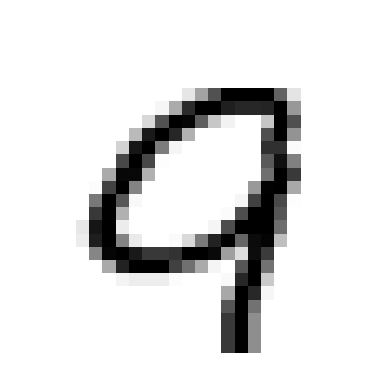

In [6]:
plt.imshow(X_train_full[3000],cmap='binary')
plt.axis("off")
plt.show()

In [7]:
y_train_full[3000]

9

<Axes: >

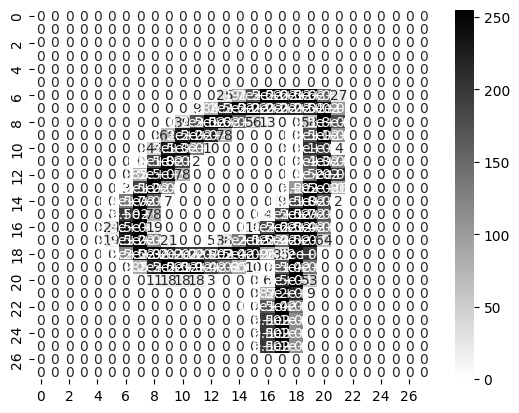

In [8]:
sns.heatmap(X_train_full[3000],annot=True,cmap='binary')

In [9]:
X_train_full.shape[0],X_train_full.shape[1],X_train_full.shape[2]

(60000, 28, 28)

In [10]:
temp = np.reshape(X_train_full,(X_train_full.shape[0],X_train_full.shape[1]*X_train_full.shape[2]))

In [11]:
temp.shape

(60000, 784)

In [12]:
X_train_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_train_valid,y_train = y_train_full[:5000],y_train_full[5000:]


<Axes: >

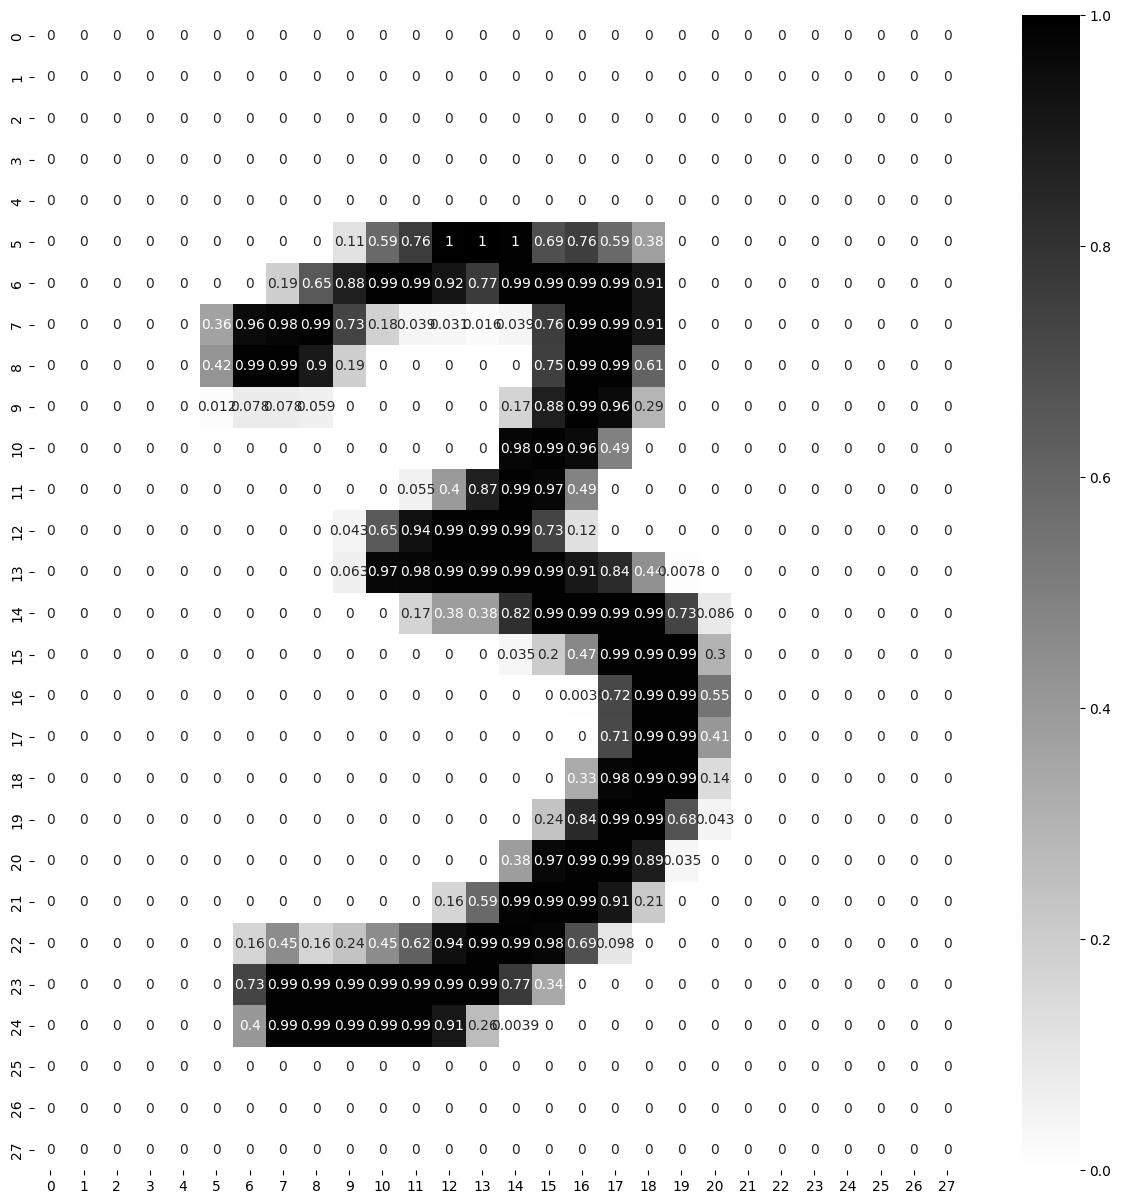

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[5000],annot=True,cmap='binary')

In [14]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
          tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
          tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
          tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model_clf = tf.keras.Sequential(LAYERS)

In [16]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputlayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
OPTIMZER='ADAM'
LOSS = 'sparse_categorical_crossentropy'
METRICS = ['accuracy']

In [18]:
model_clf.compile(optimizer=OPTIMZER,loss=LOSS,metrics=METRICS)

In [19]:
model_clf.layers[1].name

'hiddenlayer1'

In [20]:
wights,biases = model_clf.layers[1].get_weights()

In [21]:
VALIDDATION_SET = (X_train_valid,y_train_valid)

In [22]:
EPOCHS=5

In [23]:
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDDATION_SET)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8881 - loss: 0.3704 - val_accuracy: 0.9656 - val_loss: 0.1081
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9733 - loss: 0.0879 - val_accuracy: 0.9768 - val_loss: 0.0800
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9827 - loss: 0.0558 - val_accuracy: 0.9746 - val_loss: 0.0893
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9880 - loss: 0.0390 - val_accuracy: 0.9782 - val_loss: 0.0762
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9891 - loss: 0.0315 - val_accuracy: 0.9778 - val_loss: 0.0821


In [24]:
import time
import os
def save_model(model_dir='/content/SAVED_MODELs/'):
  os.makedirs(model_dir,exist_ok=True)
  file_name=time.strftime("Model_%Y_%m_%d-%H_%M_%S.keras")
  model_file=os.path.join(model_dir,file_name)
  print('Your model will be saved in the location-',model_file)
  return model_file


In [25]:
model_clf.save(save_model())

Your model will be saved in the location- /content/SAVED_MODELs/Model_2024_08_17-00_11_34.keras


In [26]:
history.params

{'verbose': 'auto', 'epochs': 5, 'steps': 1719}

In [27]:
history.history

{'accuracy': [0.9365090727806091,
  0.9724363684654236,
  0.981181800365448,
  0.9864727258682251,
  0.9882727265357971],
 'loss': [0.21188299357891083,
  0.08734530210494995,
  0.059118758887052536,
  0.042076025158166885,
  0.03479538857936859],
 'val_accuracy': [0.9656000137329102,
  0.9768000245094299,
  0.9746000170707703,
  0.9782000184059143,
  0.9778000116348267],
 'val_loss': [0.1080833226442337,
  0.08004941046237946,
  0.08930718898773193,
  0.07620864361524582,
  0.08205046504735947]}

In [28]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.936509,0.211883,0.9656,0.108083
1,0.972436,0.087345,0.9768,0.080049
2,0.981182,0.059119,0.9746,0.089307
3,0.986473,0.042076,0.9782,0.076209
4,0.988273,0.034795,0.9778,0.082050


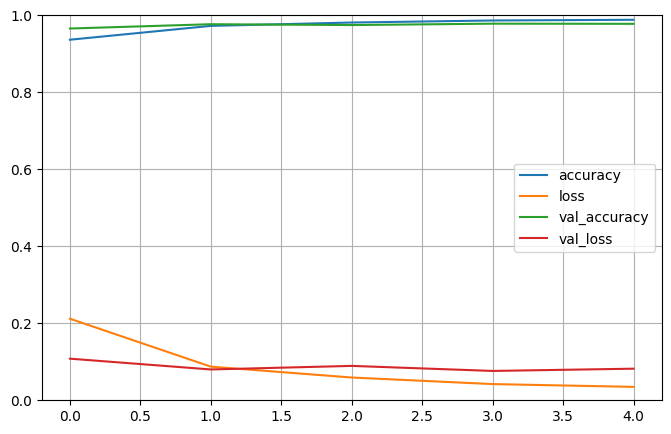

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model_clf.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 19.7666


[15.661294937133789, 0.9750999808311462]

In [31]:
y_pred  = model_clf.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
from sklearn.metrics import confusion_matrix

In [37]:
y_pred_labels = np.argmax(y_pred,axis=1)


In [40]:
y_pred_labels.shape,y_test.shape

((10000,), (10000,))

In [39]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.95      0.97      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



In [43]:
X_test[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 109, 255, 253,
        253, 253, 255, 253, 253, 170,  63,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 105, 242, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 176,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 217, 252, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 253,  35,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 217, 252, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 253, 119,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 154, 252, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 253, 179,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  52, 179, 179,  35,  35,
         35, 159, 253, 252, 252, 252, 253, 138,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  37,
        140, 221, 253, 252, 252, 252, 175,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 252,
        252, 252, 253, 252, 252, 252, 144,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 182, 253, 255, 253,
        253, 253, 255, 253, 253, 253, 145,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21, 201, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 238,  72,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21, 201, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 253, 231,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 252, 253, 252,
        252, 252, 191, 232, 252, 252, 253, 252,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  32, 109,  47,   0,   0, 182, 253, 255, 222,
        125,   0,   0,  73, 253, 253, 255, 253,  72,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 197, 252, 232,  42,   0,  46, 179, 180,  45,
          0,   0,  32, 207, 252, 252, 253, 252,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 196, 252, 252, 221,  57,  37,  37,  37,  37,
         37, 120, 212, 252, 252, 252, 253, 252,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  31, 211, 252, 252, 252, 252, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 253, 210,  31,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 182, 253, 253, 253, 253, 253, 255, 253,
        253, 253, 255, 253, 253, 253, 208,  20,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  57, 252, 252, 252, 252, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 104,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  11,  71, 133, 226, 252, 252, 253, 252,
        252, 252, 253, 252, 205,  71,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  31, 108, 108, 253, 252,
        252, 252, 108, 108,  31,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

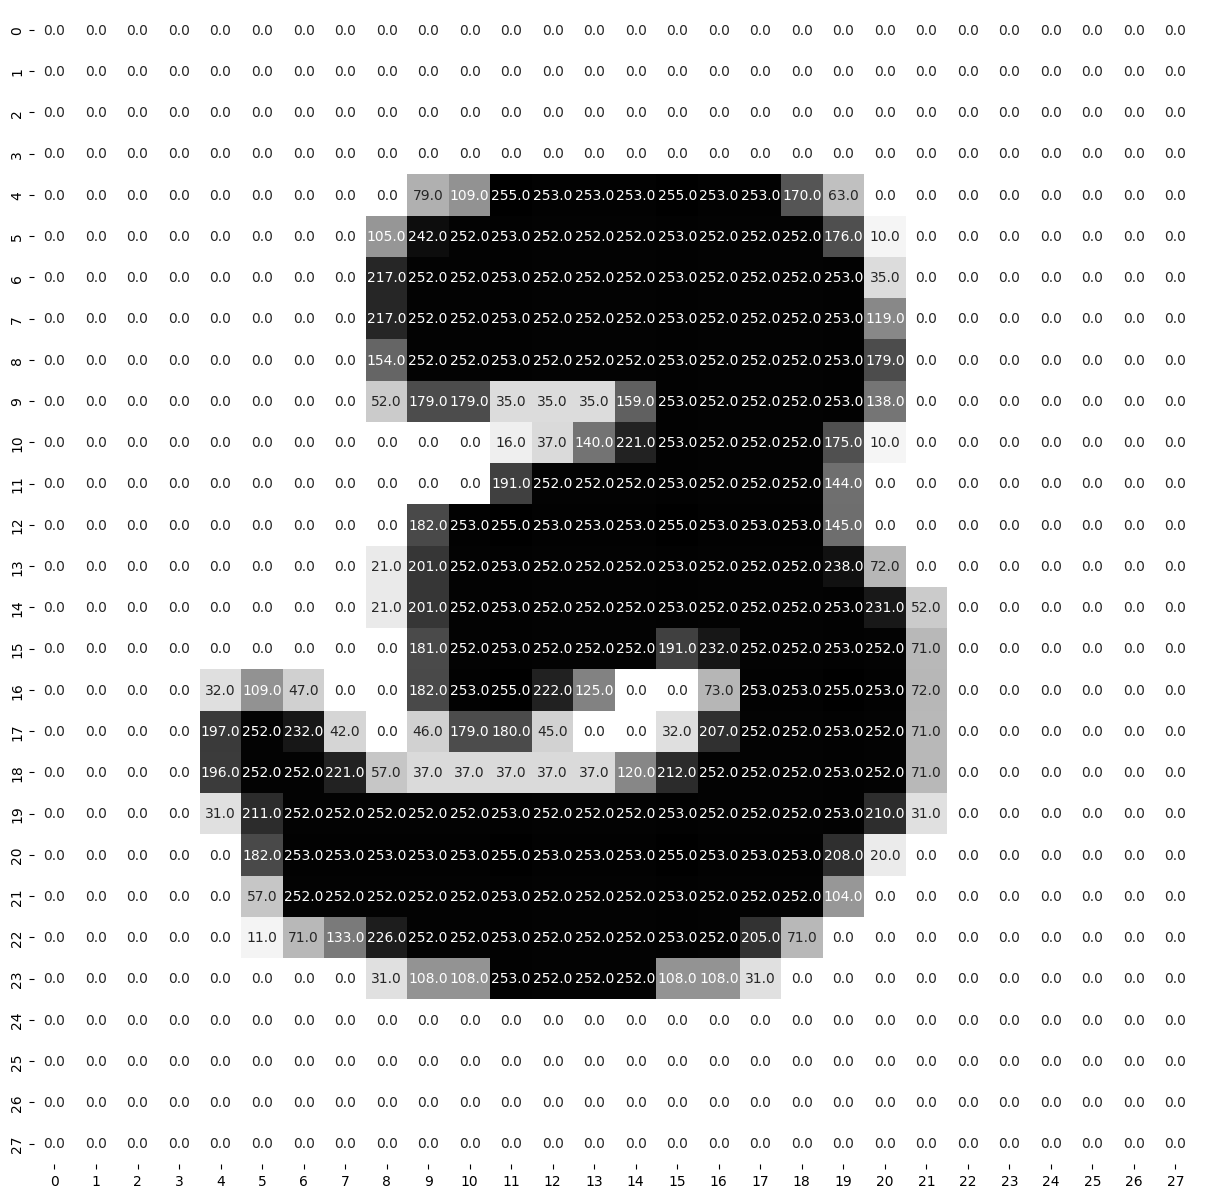

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(X_test[200], cmap='binary', annot=True, cbar=False, fmt='.1f')  # Only one decimal place
plt.show();

In [52]:
single_pred = model_clf.predict(X_test[200].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [54]:
np.argmax(single_pred,axis=1)

array([3])

In [55]:
y_test[200]

3

In [56]:
import json

# Convert the history.history dictionary to a JSON string
with open('history.json', 'w') as f:
    json.dump(history.history, f)


In [58]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/SAVED_MODELs/Model_2024_08_17-00_11_34.keras')  # Load the HDF5 model# or
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputlayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 799,832 (3.05 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 533,222 (2.03 MB)

In [59]:
single_pred_loaded_model = loaded_model.predict(X_test[200].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


In [60]:
np.argmax(single_pred_loaded_model,axis=1)

array([3])

Hence, the original model and loaded model both are giving same result.

In [61]:
y_pred_loaded_model = loaded_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [62]:
y_pred_labels_loaded_model = np.argmax(y_pred_loaded_model,axis=1)

In [65]:
print(classification_report(y_test,y_pred_labels_loaded_model))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.95      0.97      1032
           3       0.94      0.99      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



Hence the classification report produced by original model and loaded model are same.

Now we are loading the history dictionary

In [67]:
with open('history.json', 'r') as f:
    history_loaded = json.load(f)


In [72]:
pd.DataFrame(history_loaded)

,accuracy,loss,val_accuracy,val_loss
0,0.936509,0.211883,0.9656,0.108083
1,0.972436,0.087345,0.9768,0.080049
2,0.981182,0.059119,0.9746,0.089307
3,0.986473,0.042076,0.9782,0.076209
4,0.988273,0.034795,0.9778,0.082050


In [74]:
cf = confusion_matrix(y_test, y_pred_labels)
print(cf)

[[ 971    0    1    2    0    3    1    1    1    0]
 [   0 1127    0    3    0    0    2    0    3    0]
 [   4    3  985   10    2    0    0    9   19    0]
 [   0    0    3 1001    0    0    0    1    4    1]
 [   1    1    6    0  958    2    3    1    0   10]
 [   1    0    0   16    1  867    2    0    4    1]
 [   6    2    0    1    5    4  935    0    5    0]
 [   2    6    5   10    1    0    0  999    2    3]
 [   1    2    3   10    1    9    1    1  944    2]
 [   1    4    0   15    6   10    1    4    4  964]]


<Axes: >

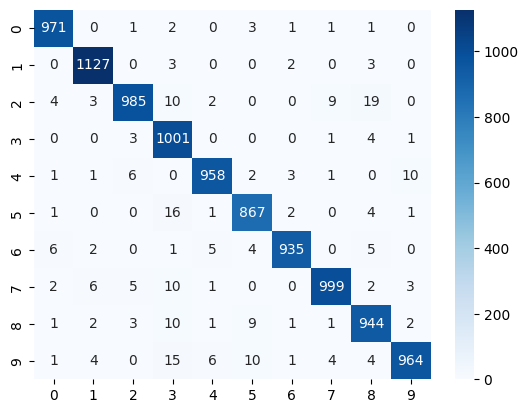

In [75]:
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')